In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
trainig_dataset = pd.read_csv('titanic_train.csv')
testing_dataset = pd.read_csv('titanic_test.csv')
titanic_dataset = pd.concat([trainig_dataset, testing_dataset], ignore_index=True, sort=False)

In [3]:
titanic_dataset.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1.0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0.0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0.0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1.0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0.0


In [4]:
for i in titanic_dataset.columns:
    if i != 'age':
        titanic_dataset.drop(i, 1, inplace=True)

## Дискретная случайная величина

Пространство элементарных исходов $ \Omega $ – возраст пассажиров Титаника. Событие – пассажиру определенное число лет.

In [5]:
titanic_dataset.dropna(inplace=True)
titanic_dataset.head()

,age
1,38.0
2,30.0
3,54.0
4,40.0
5,28.0


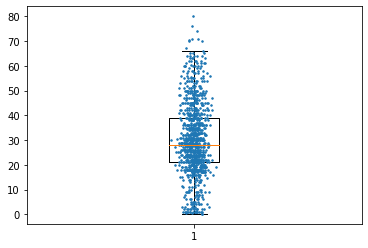

In [6]:
%matplotlib inline

plt.boxplot(titanic_dataset, showfliers=False)
y = titanic_dataset
x = np.random.normal(1, 0.02, len(y))
plt.plot(x, y, ms=1.5, marker="o", linestyle="None")

График выше – точки нашей выборки с несколькими дополнительными построениями. Верхняя и нижняя стороны прямоугольника – 75 и 25 процентили соответственно. Оранжевая линия – медиана. Верхния и нижняя горизонтальные линии – максимальное и минимальное значение выборки без учета выборосов.

In [7]:
np.percentile(titanic_dataset, 25)

21.0

In [8]:
np.percentile(titanic_dataset, 75)

39.0

Вычислим мат. ожидание, дисперсию и медиану.

In [9]:
mean = np.mean(titanic_dataset)
mean

age    29.881135
dtype: float64

In [10]:
var = np.var(titanic_dataset)
var

age    207.550361
dtype: float64

In [11]:
std = np.sqrt(np.var(titanic_dataset))
std

age    14.406608
dtype: float64

In [12]:
median = np.median(titanic_dataset)
median

28.0

Построим гистограмму.

In [13]:
bins_number = 1 + int(np.log2(len(titanic_dataset)))
bins_number

11

(array([ 66.,  43., 181., 279., 186., 105.,  91.,  52.,  33.,   7.,   3.]),
 array([ 0.1667    ,  7.42427273, 14.68184545, 21.93941818, 29.19699091,
        36.45456364, 43.71213636, 50.96970909, 58.22728182, 65.48485455,
        72.74242727, 80.        ]),
 <BarContainer object of 11 artists>)

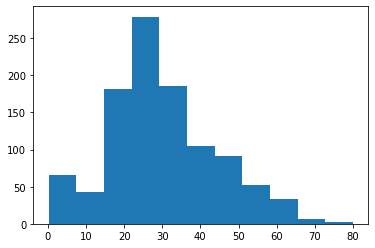

In [14]:
%matplotlib inline

x = plt.hist(titanic_dataset, bins= bins_number)
x

В некоторых отрезках значения частот получились меньше 5, объединим такие отрезки со своими соседями.

In [15]:
bins = [ 0.1667    ,  7.42427273, 14.68184545, 21.93941818, 29.19699091,
        36.45456364, 43.71213636, 50.96970909, 58.22728182, 65.48485455,
        80.        ]

(array([ 66.,  43., 181., 279., 186., 105.,  91.,  52.,  33.,  10.]),
 array([ 0.1667    ,  7.42427273, 14.68184545, 21.93941818, 29.19699091,
        36.45456364, 43.71213636, 50.96970909, 58.22728182, 65.48485455,
        80.        ]),
 <BarContainer object of 10 artists>)

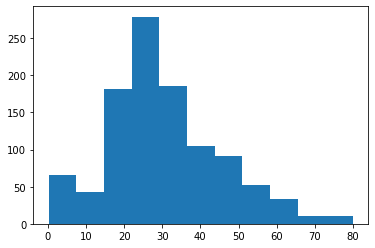

In [16]:
%matplotlib inline

x = plt.hist(titanic_dataset, bins= bins)
x

Выдвигаю гипотезу $ H_0^1 $ – случайная величина распределена нормально. \
Выдвигаю гипотезу $ H_0^2 $ – случайная величина распределена логнормально. \
Выдвигаю гипотезу $ H_0^3 $ – случайная величина распределена по закону гамма-распределения. \
Уровень значимости $ \alpha = 0.05$

С помощью .fit найдем параметры распределений, наиболее близко моделирующих выборку.

In [17]:
norm_param = stats.norm.fit(np.array(titanic_dataset))
norm_param

(29.8811345124283, 14.40660823421771)

In [18]:
lognorm_param = stats.lognorm.fit(np.array(titanic_dataset))
lognorm_param

(0.1368092898529451, -74.93191992994822, 103.83671081740049)

In [19]:
gamma_param = stats.gamma.fit(np.array(titanic_dataset))
gamma_param

(24.756119004507823, -41.77278554767926, 2.8943923412466352)

Найдем середины всех интервалов на гистограмме, чтобы в дальнейшем использовать их для отображения на гистограмме функций плотности распределения вероятностей

In [20]:
mids_of_bins = [x[1][i-1] + (x[1][i] - x[1][i-1]) / 2 for i in range(1, len(x[1]))]
mids_of_bins

[3.7954863650000004,
 11.053059090000001,
 18.310631815,
 25.568204545,
 32.825777275,
 40.08335,
 47.340922725,
 54.598495455000005,
 61.856068185,
 72.742427275]

Найдем функции распределения вероятностей в этих точка.

In [21]:
norm_pdf = stats.norm.pdf(mids_of_bins, *norm_param)
norm_pdf

array([0.00537556, 0.01178855, 0.02005772, 0.0264781 , 0.02711917,
       0.02155015, 0.01328644, 0.00635552, 0.00235873, 0.00033137])

In [22]:
lognorm_pdf = stats.lognorm.pdf(mids_of_bins, *lognorm_param)
lognorm_pdf

array([0.0047817 , 0.01310669, 0.02295196, 0.0282002 , 0.02608597,
       0.01917578, 0.01168339, 0.00609943, 0.00280189, 0.00071851])

In [23]:
gamma_pdf = stats.gamma.pdf(mids_of_bins, *gamma_param)
gamma_pdf

array([0.00484399, 0.01321257, 0.02291778, 0.02803595, 0.02598494,
       0.01921369, 0.01177812, 0.00616428, 0.00281844, 0.00070331])

Отобразим плотности вероятности вместе с гистограммой эмпирической оценки плотности по выборке.

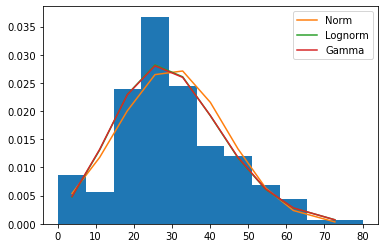

In [24]:
%matplotlib inline

plt.hist(titanic_dataset, bins= bins, density=True)
plt.plot(mids_of_bins, norm_pdf, label='Norm')
plt.plot(mids_of_bins, lognorm_pdf, label='Lognorm')
plt.plot(mids_of_bins, gamma_pdf, label='Gamma')
plt.legend()

Для нахождения теоретических частот требуется использовать кумулятивные функции распределения.

In [25]:
norm_cdf = stats.norm.cdf(x[1], *norm_param)
norm_cdf

array([0.01957742, 0.05952317, 0.14570762, 0.2907294 , 0.48106208,
       0.67590523, 0.83148388, 0.92837742, 0.97544178, 0.99326973,
       0.99974824])

In [26]:
lognorm_cdf = stats.lognorm.cdf(x[1], *lognorm_param)
lognorm_cdf

array([0.00893291, 0.04512501, 0.14079397, 0.30588875, 0.50819375,
       0.69603264, 0.83507344, 0.9204927 , 0.96547159, 0.98630649,
       0.99827768])

In [27]:
gamma_cdf = stats.gamma.cdf(x[1], *gamma_param)
gamma_cdf

array([0.00872293, 0.04535849, 0.14172942, 0.30658009, 0.50776022,
       0.69488899, 0.83417584, 0.92025489, 0.96569981, 0.98666216,
       0.99845059])

Найдем теоретические частоты для каждого распределения.

In [28]:
expected_freq_norm = len(titanic_dataset) * np.diff(norm_cdf)
expected_freq_norm

array([ 41.78325247,  90.14893996, 151.69278209, 199.08797332,
       203.80593645, 162.73527611, 101.35063772,  49.22932168,
        18.64803757,   6.77652204])

In [29]:
expected_freq_lognorm = len(titanic_dataset) * np.diff(lognorm_cdf)
expected_freq_lognorm

array([ 37.85693908, 100.06972817, 172.68914167, 211.61103439,
       196.47947027, 145.43668403,  89.34853914,  47.04792664,
        21.79329958,  12.52186723])

In [30]:
expected_freq_gamma = len(titanic_dataset) * np.diff(gamma_cdf)
expected_freq_gamma

array([ 38.32079414, 100.80399302, 172.43380367, 210.4344167 ,
       195.73669426, 145.69403898,  90.03869469,  47.53538454,
        21.92661861,  12.33069504])

In [31]:
x[0]

array([ 66.,  43., 181., 279., 186., 105.,  91.,  52.,  33.,  10.])

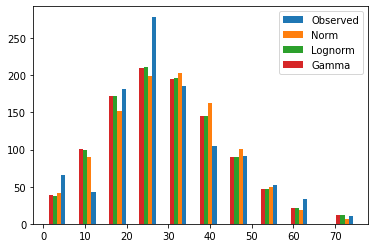

In [32]:
%matplotlib inline
mids_of_bins = np.array(mids_of_bins)
width = 1
plt.bar(mids_of_bins+1, x[0], width=width, label='Observed')
plt.bar(mids_of_bins, expected_freq_norm, width=width, label='Norm')
plt.bar(mids_of_bins - 1, expected_freq_lognorm, width=width, label='Lognorm')
plt.bar(mids_of_bins - 2, expected_freq_gamma, width=width, label='Gamma')
plt.legend()

Применим критерий хи-квадрат.

In [33]:
stats.chisquare(f_obs=np.array(x[0]), f_exp=np.array(expected_freq_norm))

Power_divergenceResult(statistic=112.2640767169706, pvalue=5.083844272109417e-20)

In [34]:
stats.chisquare(f_obs=x[0], f_exp=expected_freq_lognorm)

Power_divergenceResult(statistic=93.95324110494504, pvalue=2.612850198044191e-16)

In [35]:
stats.chisquare(f_obs=x[0], f_exp=expected_freq_gamma)

Power_divergenceResult(statistic=94.21853650490165, pvalue=2.310460293600717e-16)

Результаты кажутся странными, напишем критерий хи-квадрат вручную, сначала посчитаем значение статистики хи-квадрат, а затем – p-value.

In [36]:
dof = len(x[0]) - 1
dof

9

Нормальное распределение

In [37]:
chi2_statistic_norm = sum(np.divide(np.square(np.subtract(x[0], expected_freq_norm)), expected_freq_norm))
chi2_statistic_norm

112.26407671697062

In [38]:
stats.chi2.sf(chi2_statistic_norm, dof)

5.08384427210938e-20

Логнормальное распределение

In [39]:
chi2_statistic_lognorm = sum(np.divide(np.square(np.subtract(x[0], expected_freq_lognorm)), expected_freq_lognorm))
chi2_statistic_lognorm

93.95324110494502

In [40]:
stats.chi2.sf(chi2_statistic_lognorm, dof)

2.612850198044211e-16

Гамма-распределение

In [41]:
chi2_statistic_gamma = sum(np.divide(np.square(np.subtract(x[0], expected_freq_gamma)), expected_freq_gamma))
chi2_statistic_gamma

94.21853650490166

In [42]:
stats.chi2.sf(chi2_statistic_gamma, dof)

2.3104602936006987e-16

Получили результаты аналогичные встроенной функции.

Критический уровень критерия хи-квадрат для уровня значимости 0,05

In [43]:
stats.chi2.ppf(0.95, dof)

16.918977604620448

Критический уровень $ \chi_{0.05,9}^2 = 16.918977604620448 $.  
Ни один из тестов не дал значение критерия $ \chi^2 $ меньше критического. Следовательно, есть основания для отклонения всех нулевых гипотез. \
Также ни одно из значений p-value не превышает 0.05, что также дает основание для отклонения всех нулевых гипотез.